Case Study on Probability for Data Science
Problem Statement:

To make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p) using the given dataset.
(Along with other ML algorithms, Naïve Bayes’ Classifier should be applied)

Also, if some data pre-processing is necessary do that as well.

Attribute Information:

• cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s

• cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s

• cap-colour: brown=n, buff=b, cinnamon=c, Gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y

• bruises: bruises=t, no=f

• odour: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s

• gill-attachment: attached=a, descending=d, free=f, notched=n

• gill-spacing: close=c, crowded=w, distant=d

• gill-size: broad=b, narrow=n

• gill-colour: black=k, brown=n, buff=b, chocolate=h,grey=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

• stalk-shape: enlarging=e, tapering=t

• Stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?

• stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s

• stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s 

• stalk-colour-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

• stalk-colour-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

• veil-type: partial=p, universal=u

• veil-colour: brown=n, orange=o, white=w, yellow=y

• ring-number: none=n, one=o, two=t

• ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z

• spore-print-colour: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y

• population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y

• habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d 

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df=pd.read_csv(r"mushrooms.csv")
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [72]:
print(df.columns,'\n',df.shape)
df.info()

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object') 
 (8124, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-atta

In [73]:
df.mask(df=='?', np.nan, inplace=True)
df.isna().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [74]:
df.dropna(inplace=True)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,e,b,y,n,f,n,f,c,b,w,...,y,n,n,p,w,t,p,w,y,p
8001,e,x,y,n,f,n,f,c,b,w,...,y,n,n,p,w,t,p,w,y,p
8038,e,x,y,g,t,n,f,c,b,w,...,s,w,w,p,w,t,p,w,y,p
8095,p,x,y,c,f,m,f,c,b,y,...,y,c,c,p,w,n,n,w,c,d


In [76]:
df = df.astype('category')
df.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [77]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])
df = df.drop(["veil-type"],axis=1)
df=df.copy()
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,...,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000
mean,0.381999,3.420269,1.627215,4.272856,0.564139,3.564848,0.996811,0.181432,0.124734,3.536853,...,1.572644,1.619419,3.949681,3.932672,0.001417,1.014883,2.096386,1.215450,3.712970,1.236003
std,0.485919,1.659641,1.336497,1.838018,0.495913,1.765806,0.056388,0.385410,0.330447,2.281428,...,0.670010,0.721620,1.526058,1.525402,0.037625,0.165600,1.192716,1.059125,1.328741,1.597981
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,1.000000,3.000000,3.000000,0.000000,1.000000,1.000000,0.000000,3.000000,0.000000
50%,0.000000,5.000000,2.000000,4.000000,1.000000,5.000000,1.000000,0.000000,0.000000,4.000000,...,2.000000,2.000000,5.000000,5.000000,0.000000,1.000000,3.000000,1.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,6.000000,1.000000,5.000000,1.000000,0.000000,0.000000,6.000000,...,2.000000,2.000000,5.000000,5.000000,0.000000,1.000000,3.000000,2.000000,5.000000,1.000000
max,1.000000,5.000000,3.000000,7.000000,1.000000,6.000000,1.000000,1.000000,1.000000,8.000000,...,3.000000,3.000000,6.000000,6.000000,1.000000,2.000000,3.000000,5.000000,5.000000,5.000000


In [78]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,2,...,2,2,5,5,0,1,3,1,3,5
1,0,5,2,7,1,0,1,0,0,2,...,2,2,5,5,0,1,3,2,2,1
2,0,0,2,6,1,3,1,0,0,3,...,2,2,5,5,0,1,3,2,2,3
3,1,5,3,6,1,6,1,0,1,3,...,2,2,5,5,0,1,3,1,3,5
4,0,5,2,3,0,5,1,1,0,2,...,2,2,5,5,0,1,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,0,0,3,4,0,5,1,0,0,7,...,3,3,3,3,0,2,3,5,5,4
8001,0,5,3,4,0,5,1,0,0,7,...,3,3,3,3,0,2,3,5,5,4
8038,0,5,3,3,1,5,1,0,0,7,...,2,2,5,5,0,2,3,5,5,4
8095,1,5,3,1,0,4,1,0,0,8,...,1,3,1,1,0,0,2,5,1,0


In [79]:
# from sklearn.preprocessing import StandardScaler
# scalar = StandardScaler()
# df =scalar.fit_transform(dfencod)
# df = pd.DataFrame(df, columns = df.columns)
# df.describe()

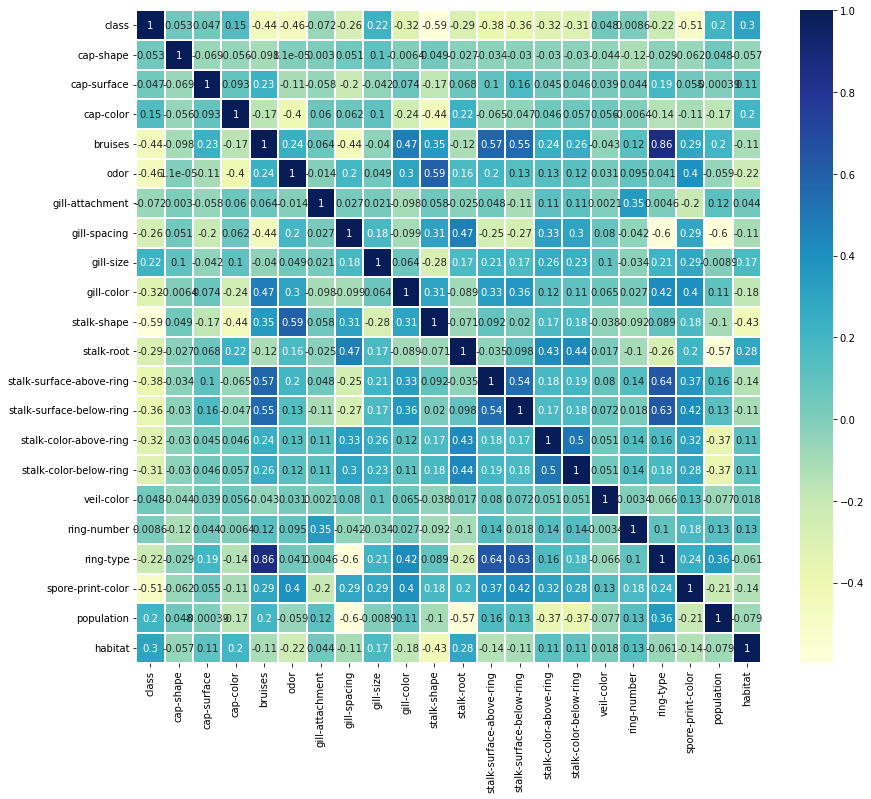

In [80]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In [81]:
from sklearn.model_selection import train_test_split
X=df.drop(['class'], axis=1)
Y=df['class']
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.1)

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import f1_score

DesTr = DecisionTreeClassifier(random_state=42)
GausNB = GaussianNB()
logireg = LogisticRegression()
RFC=RandomForestClassifier(n_estimators=100)
KNN = KNeighborsClassifier(n_neighbors=15)
SVM = SVC(random_state=42)
SGD = SGDClassifier(loss='modified_huber',shuffle=True,random_state=101)

logireg.fit(X_train, Y_train)
logireg_y_pred_train=logireg.predict(X_train)
logireg_y_pred_test=logireg.predict(X_test)
logireg_train_score = f1_score(Y_train.values, logireg_y_pred_train)
logireg_test_score = f1_score(Y_test.values, logireg_y_pred_test)
print("LogisticRegression Accuracy:",metrics.accuracy_score(Y_test,logireg_y_pred_test))
print("LogisticRegression: F1 score{train:",logireg_train_score, ", test:",logireg_test_score,"}")

DesTr.fit(X_train, Y_train)
DesTr_y_pred_train = DesTr.predict(X_train)
DesTr_y_pred_test = DesTr.predict(X_test)
DesTr_train_score = f1_score(Y_train.values, DesTr_y_pred_train)
DesTr_test_score = f1_score(Y_test.values, DesTr_y_pred_test)
print("DecisionTree Accuracy:",metrics.accuracy_score(Y_test, DesTr_y_pred_test))
print("DecisionTreeClassifier: F1 score{train:",DesTr_train_score, ", test:",DesTr_test_score,"}")

GausNB.fit(X_train, Y_train)
GausNB_y_pred_train = GausNB.predict(X_train)
GausNB_y_pred_test = GausNB.predict(X_test)
GausNB_train_score = f1_score(Y_train.values, GausNB_y_pred_train)
GausNB_test_score = f1_score(Y_test.values, GausNB_y_pred_test)
print("GaussianNB Accuracy:",metrics.accuracy_score(Y_test, GausNB_y_pred_test))
print("GaussianNB: F1 score{train:",GausNB_train_score, ", test:",GausNB_test_score,"}")

RFC.fit(X_train, Y_train)
RFC_y_pred_train=RFC.predict(X_train)
RFC_y_pred_test=RFC.predict(X_test)
RFC_train_score = f1_score(Y_train.values, RFC_y_pred_train)
RFC_test_score = f1_score(Y_test.values, RFC_y_pred_test)
print("RandomForest Accuracy:",metrics.accuracy_score(Y_test,RFC_y_pred_test))
print("RandomForest: F1 score{train:",RFC_train_score, ", test:",RFC_test_score,"}")


KNN.fit(X_train, Y_train)
KNN_y_pred_train = KNN.predict(X_train)
KNN_y_pred_test=KNN.predict(X_test)
KNN_train_score = f1_score(Y_train.values, KNN_y_pred_train)
KNN_test_score = f1_score(Y_test.values,KNN_y_pred_test)
print("KNeighbors Accuracy:",metrics.accuracy_score(Y_test,KNN_y_pred_test))
print("KNeighbors: F1 score{train:",KNN_train_score, ", test:",KNN_test_score,"}")

SVM.fit(X_train, Y_train)
SVM_y_pred_train = SVM.predict(X_train)
SVM_y_pred_test=SVM.predict(X_test)
SVM_train_score = f1_score(Y_train.values, SVM_y_pred_train)
SVM_test_score = f1_score(Y_test.values,SVM_y_pred_test)
print("SVM Accuracy:",metrics.accuracy_score(Y_test,SVM_y_pred_test))
print("SVM: F1 score{train:",SVM_train_score, ", test:",SVM_test_score,"}")

SGD.fit(X_train, Y_train)
SGD_y_pred_train = SGD.predict(X_train)
SGD_y_pred_test=SGD.predict(X_test)
SGD_train_score = f1_score(Y_train.values, SGD_y_pred_train)
SGD_test_score = f1_score(Y_test.values, SGD_y_pred_test)
print("SGD Accuracy:",metrics.accuracy_score(Y_test,SGD_y_pred_test))
print("SGD: F1 score{train:",SGD_train_score, ", test:",SGD_test_score,"}")




C:\Users\ADAM\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression Accuracy: 0.9716814159292035
LogisticRegression: F1 score{train: 0.9560496380558429 , test: 0.9576719576719576 }
DecisionTree Accuracy: 1.0
DecisionTreeClassifier: F1 score{train: 1.0 , test: 1.0 }
GaussianNB Accuracy: 0.7469026548672566
GaussianNB: F1 score{train: 0.37489878542510124 , test: 0.43027888446215135 }
RandomForest Accuracy: 1.0
RandomForest: F1 score{train: 1.0 , test: 1.0 }
KNeighbors Accuracy: 0.9964601769911504
KNeighbors: F1 score{train: 0.997966446365023 , test: 0.9947916666666666 }
SVM Accuracy: 1.0
SVM: F1 score{train: 0.998470168281489 , test: 1.0 }
SGD Accuracy: 0.9610619469026549
SGD: F1 score{train: 0.9465723347157843 , test: 0.945273631840796 }
